In [85]:
# runtime
#director,writer
#actor if I can get to it
# Here I will work on the first recommendation
import pandas as pd 
import matplotlib.pyplot as plt
import sqlite3

In [58]:
#file_paths
tn_budgets_file_path = './../Data/Phase_1_Project_Data/tn.movie_budgets.csv.gz'
imdb_file_path = './../Data/Phase_1_Project_Data/im.db'



In [59]:
# compressed file is too large for github, file path for extracted files specified below
#creating the tn_budgets_df data Frame
tn_budgets_df = pd.read_csv(tn_budgets_file_path)


In [60]:
# here I am taking a look at the columns of the dataframe
tn_budgets_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [66]:
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [72]:
tn_budgets_df['production_budget_float'] = tn_budgets_df['production_budget'].str.replace(",","")
tn_budgets_df['production_budget_float'] = tn_budgets_df['production_budget_float'].str[1:]
tn_budgets_df['production_budget_float'] = tn_budgets_df['production_budget_float'].astype(float)

In [73]:
tn_budgets_df['worldwide_gross_float'] = tn_budgets_df['worldwide_gross'].str.replace(",","")
tn_budgets_df['worldwide_gross_float'] = tn_budgets_df['worldwide_gross_float'].str[1:]
tn_budgets_df['worldwide_gross_float'] = tn_budgets_df['worldwide_gross_float'].astype(float)

In [74]:
tn_budgets_df['gross_revenue'] = tn_budgets_df['worldwide_gross_float'] - tn_budgets_df['production_budget_float']

In [78]:
tn_budgets_df = tn_budgets_df.drop(['production_budget_int','worldwide_gross_int'],axis=1)
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_float,worldwide_gross_float,gross_revenue
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000.0,2.776345e+09,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000.0,1.045664e+09,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000.0,1.497624e+08,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000.0,1.403014e+09,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000.0,1.316722e+09,9.997217e+08


In [62]:
# compressed file is too large for github, file path for extracted files specified below
conn = sqlite3.connect(imdb_file_path) 

imdb_db = pd.read_sql('''
                               SELECT
                               *
                               FROM sqlite_master
                               ''', conn)
imdb_db

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [63]:
imdb_table = pd.read_sql('''
                            SELECT
                               movie_id,primary_title,runtime_minutes
                               FROM movie_basics
                               ''', conn)

In [65]:
imdb_table.head()

,movie_id,primary_title,runtime_minutes
0,tt0063540,Sunghursh,175.0
1,tt0066787,One Day Before the Rainy Season,114.0
2,tt0069049,The Other Side of the Wind,122.0
3,tt0069204,Sabse Bada Sukh,NaN
4,tt0100275,The Wandering Soap Opera,80.0


In [83]:
#attempting to join the tables
title_and_revenue_df = pd.merge(tn_budgets_df, imdb_table,left_on='movie',right_on='primary_title')
title_and_revenue_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_float,worldwide_gross_float,gross_revenue,movie_id,primary_title,runtime_minutes
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000.0,2.776345e+09,2.351345e+09,tt1775309,Avatar,93.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000.0,1.045664e+09,6.350639e+08,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000.0,1.497624e+08,-2.002376e+08,tt6565702,Dark Phoenix,113.0
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000.0,1.403014e+09,1.072414e+09,tt2395427,Avengers: Age of Ultron,141.0
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300000000.0,2.048134e+09,1.748134e+09,tt4154756,Avengers: Infinity War,149.0


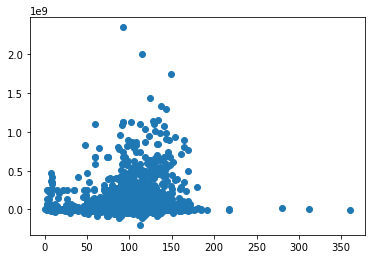

In [91]:
plt.scatter(title_and_revenue_df['runtime_minutes'],title_and_revenue_df['gross_revenue'])